In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from catboost import CatBoostRegressor

import warnings
warnings.filterwarnings('ignore')


def mean_absolute_percentage_error(actual, pred): 
    return np.mean(np.abs((actual - pred) / actual)) * 100

def evaluate_model(model_name, model, X, y):
    
    predictions = model.predict(X)

    MAE = mean_absolute_error(y, predictions)
    MAPE = mean_absolute_percentage_error(y, predictions)
    RMSE = mean_squared_error(y, predictions, squared = False)
    R2 = r2_score(y, predictions)

    print('MAE for', model_name, ': %1.3f' % MAE)
    print('MAPE for', model_name, ': %1.3f' % MAPE)
    print('RMSE for', model_name, ': %1.3f' % RMSE)
    print('R2 for', model_name, ': %1.3f' % R2)
    
    
def plot_predictions(model, x, y, title):
    
    plt.figure(figsize = (7, 4))
    sns.scatterplot(x = y, y = model.predict(x), s = 20)
    sns.lineplot([0, 1000], [0, 1000], color = 'black', linewidth = 1)
    plt.title(title + '\n')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.show()

In [2]:
listings_link = 'data/listings_modeling.csv'
listings = pd.read_csv(listings_link)

Train test split

In [3]:
y = listings['price']
X = listings.drop('price', 1).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 20202020, train_size = 0.8)

Categorical features - gmbs can handle them without one hot encoding

In [4]:
categorical_features = X.select_dtypes(include = 'O').columns.tolist()
print(categorical_features)

['host_response_time', 'room_type', 'accommodates', 'bedrooms', 'neighbourhood_cleansed_grouped', 'bathrooms_count']


## 1. Baseline default CatBoost

In [45]:
default_model = CatBoostRegressor(random_state = 20202020, 
                                  learning_rate = 0.03,
                                  iterations = 1000,
                                  # early_stopping_rounds = 15,
                                  cat_features = categorical_features,
                                  one_hot_max_size = 20,
                                  verbose = 100)
default_model.fit(X_train, y_train, eval_set = (X_test, y_test), plot = True, verbose = False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [46]:
evaluate_model('Default CatBoost', default_model, X_test, y_test)

MAE for Default CatBoost : 33.242
MAPE for Default CatBoost : 28.633
RMSE for Default CatBoost : 66.363
R2 for Default CatBoost : 0.551


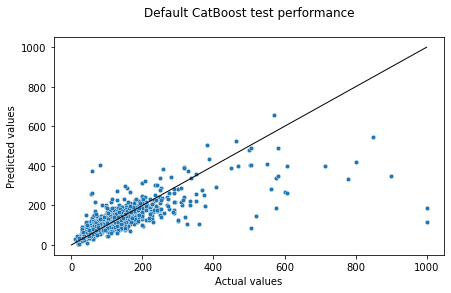

In [47]:
plot_predictions(default_model, X_test, y_test, 'Default CatBoost test performance')

### Feature statistics

In [48]:
categorical_features

['host_response_time',
 'room_type',
 'accommodates',
 'bedrooms',
 'neighbourhood_cleansed_grouped',
 'bathrooms_count']

In [49]:
default_model.calc_feature_statistics(X_train, y_train, 'bathrooms_count')

IndexError: list index out of range